<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
C:\Users\vasil\AppData\Local\Temp\ipykernel_2428\2911703515.py:61: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"$\gamma_1$ = {gamma_1}", fontsize=14)


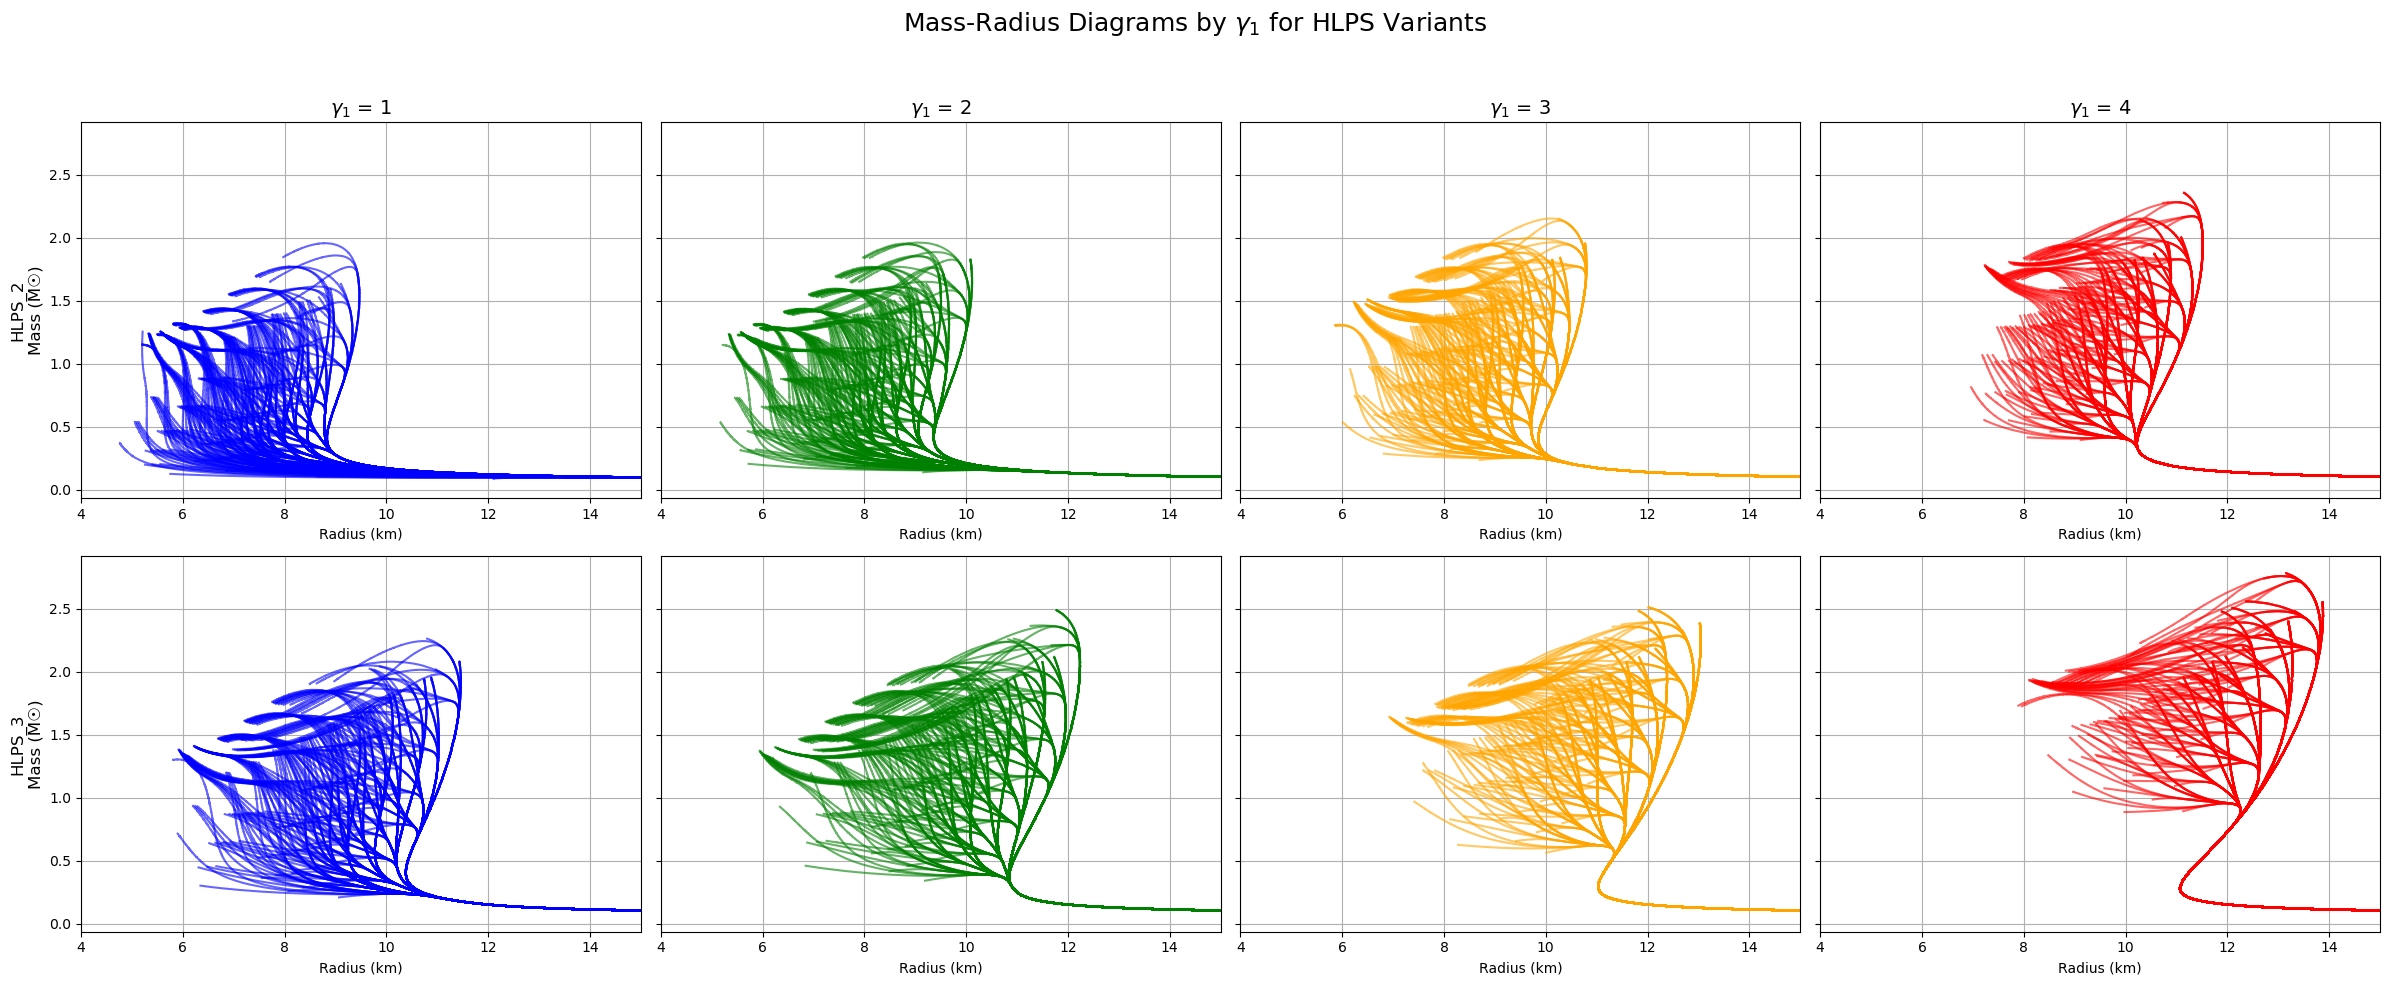

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# ---- Configuration ----

gamma_options = [1, 2, 3, 4]
segments = 5
base_folder = "polytropic_stars/polytropic_main"
hlps_variants = ["HLPS_2", "HLPS_3"]

# Color map for gamma_1
gamma_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red'
}

# Map EOS index to gamma_1
def get_gamma1_from_filename(filename):
    index = int(filename.split("_")[1])
    all_gamma_paths = list(product(gamma_options, repeat=segments))
    return all_gamma_paths[index - 1][0]  # gamma_1

# ---- Organize Files by HLPS variant and gamma_1 ----

files_by_variant_and_gamma1 = {variant: {g: [] for g in gamma_options} for variant in hlps_variants}

for variant in hlps_variants:
    folder = os.path.join(base_folder, f"TOV_results_1_2_3_4_{variant}")
    for filepath in sorted(glob.glob(os.path.join(folder, "*TOV.csv"))):
        filename = os.path.basename(filepath)
        gamma_1 = get_gamma1_from_filename(filename)
        files_by_variant_and_gamma1[variant][gamma_1].append(filepath)

# ---- Create 2-row Subplots (rows: HLPS variants, columns: gamma_1) ----

fig, axs = plt.subplots(len(hlps_variants), len(gamma_options), figsize=(6 * len(gamma_options), 5 * len(hlps_variants)), sharey=True)

if len(hlps_variants) == 1:
    axs = [axs]  # ensure 2D list structure
elif len(gamma_options) == 1:
    axs = [[ax] for ax in axs]  # if only one gamma, axs is a column

for row_idx, variant in enumerate(hlps_variants):
    for col_idx, gamma_1 in enumerate(gamma_options):
        ax = axs[row_idx][col_idx]
        color = gamma_colors[gamma_1]
        for filepath in files_by_variant_and_gamma1[variant][gamma_1]:
            data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
            if data.ndim != 2 or data.shape[0] == 0:
                continue
            M_vals = data[:, 0]
            R_vals = data[:, 1]
            ax.plot(R_vals, M_vals, color=color, alpha=0.6)

        if row_idx == 0:
            ax.set_title(f"$\gamma_1$ = {gamma_1}", fontsize=14)
        if col_idx == 0:
            ax.set_ylabel(f"{variant}\nMass (M☉)", fontsize=12)

        ax.set_xlabel("Radius (km)")
        ax.grid(True)
        ax.set_xlim(4, 15)

fig.suptitle("Mass-Radius Diagrams by $\\gamma_1$ for HLPS Variants", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.savefig(os.path.join(base_folder, "MR_diagram_HLPS2_HLPS3_by_gamma1.png"))
plt.show()


C:\Users\vasil\AppData\Local\Temp\ipykernel_2428\1060233980.py:69: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


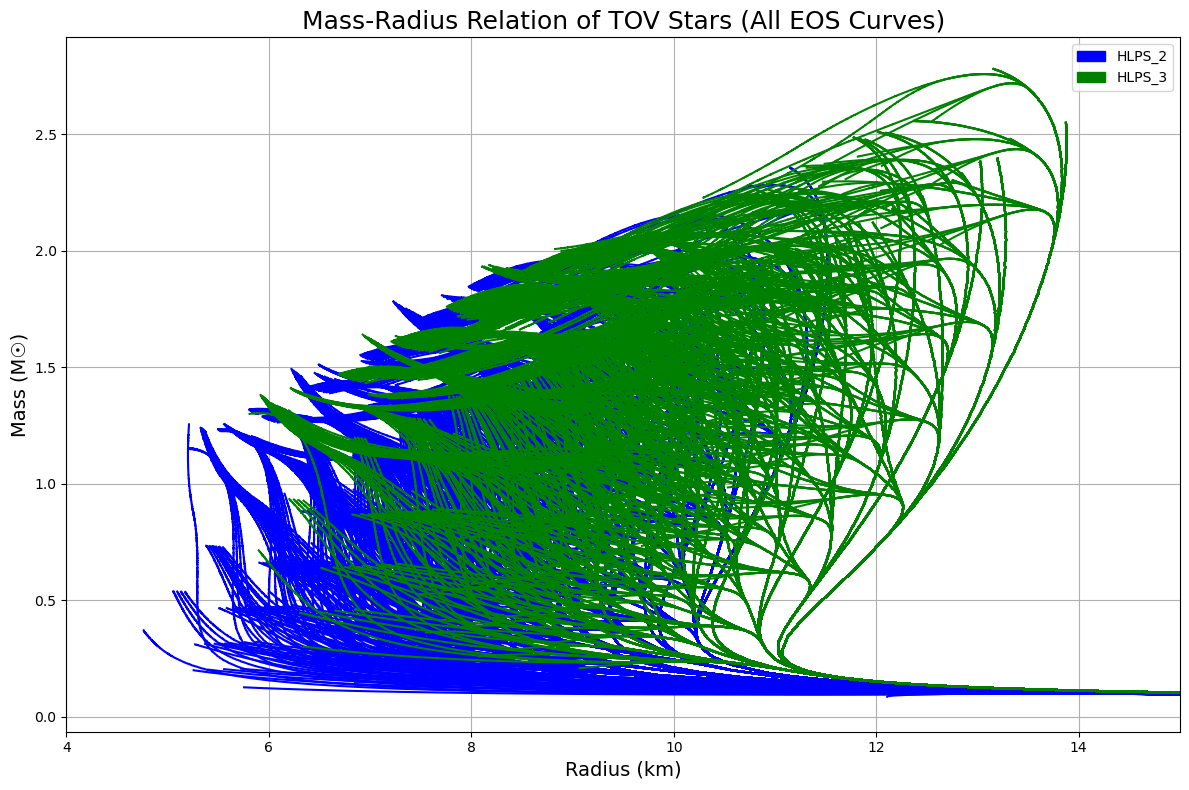

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import fnmatch

# --- Configurations ---
gamma_options = [1, 2, 3, 4]
segments = 5
base_folder = "polytropic_stars/polytropic_main"
hlps_variants = ["HLPS_2", "HLPS_3"]

# Colors for HLPS variants and Quark stars
variant_colors = {
    "HLPS_2": "blue",
    "HLPS_3": "green",
    "Quark": "black"
}

# --- Helper function ---
from itertools import product
def get_gamma1_from_filename(filename):
    index = int(filename.split("_")[1])
    all_gamma_paths = list(product(gamma_options, repeat=segments))
    return all_gamma_paths[index - 1][0]

# --- Start plot ---
plt.figure(figsize=(12, 8))

# Plot HLPS2 and HLPS3 EOS curves
for variant in hlps_variants:
    folder = os.path.join(base_folder, f"TOV_results_1_2_3_4_{variant}")
    if not os.path.exists(folder):
        continue
    for filepath in sorted(glob.glob(os.path.join(folder, "*TOV.csv"))):
        data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
        if data.ndim != 2 or data.shape[1] < 2:
            continue
        M_vals, R_vals = data[:, 0], data[:, 1]
        plt.plot(R_vals, M_vals, color=variant_colors[variant], alpha=1)

# Final formatting
plt.xlabel("Radius (km)", fontsize=14)
plt.ylabel("Mass (M☉)", fontsize=14)
plt.title("Mass-Radius Relation of TOV Stars (All EOS Curves)", fontsize=18)
plt.grid(True)
plt.xlim(4, 15)

# Legend handles (manual)
import matplotlib.patches as mpatches
patch_hlps2 = mpatches.Patch(color=variant_colors["HLPS_2"], label="HLPS_2")
patch_hlps3 = mpatches.Patch(color=variant_colors["HLPS_3"], label="HLPS_3")
plt.legend(handles=[patch_hlps2, patch_hlps3])

plt.tight_layout()
plt.show()


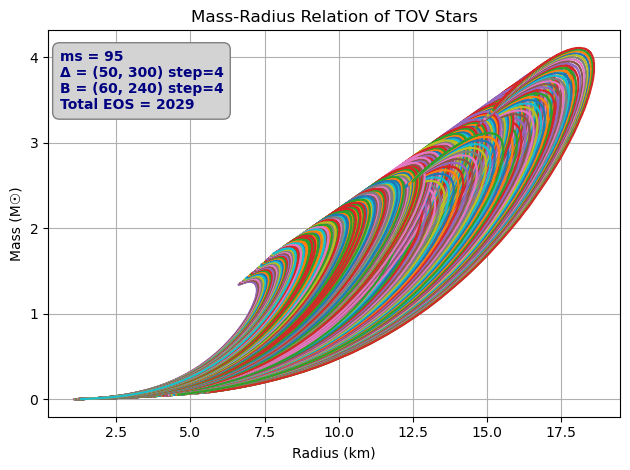

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import fnmatch

# List of folders to search
folders = ['Quark Stars/TOV_results_Quark_Stars_part1', 'Quark Stars/TOV_results_Quark_Stars_part2']
pattern = '*.csv'

# Loop through each folder and collect matching CSV files
for folder in folders:
    if not os.path.exists(folder):
        continue  # Skip missing folders

    files = [f for f in os.listdir(folder) if fnmatch.fnmatch(f, pattern)]

    for file in files:
        filepath = os.path.join(folder, file)
        
        # Load CSV data, skipping header
        data = np.genfromtxt(filepath, delimiter=',', skip_header=1)

        if data.ndim == 1 or data.shape[1] < 2:
            continue  # Skip malformed or incomplete files

        # Plot Mass vs Radius
        plt.plot(data[:, 1], data[:, 0], label=f"{folder}/{file.split('.')[0]}")

# Final plot formatting
plt.ylabel("Mass (M☉)")
plt.xlabel("Radius (km)")
plt.title("Mass-Radius Relation of TOV Stars")
plt.grid(True)
plt.text(
    0.02, 0.95,
    'ms = 95\nΔ = (50, 300) step=4\nB = (60, 240) step=4\nTotal EOS = 2029',
    transform=plt.gca().transAxes,
    fontsize=10,
    fontweight='bold',
    color='navy',
    ha='left',  # horizontal alignment
    va='top',   # vertical alignment
    bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()


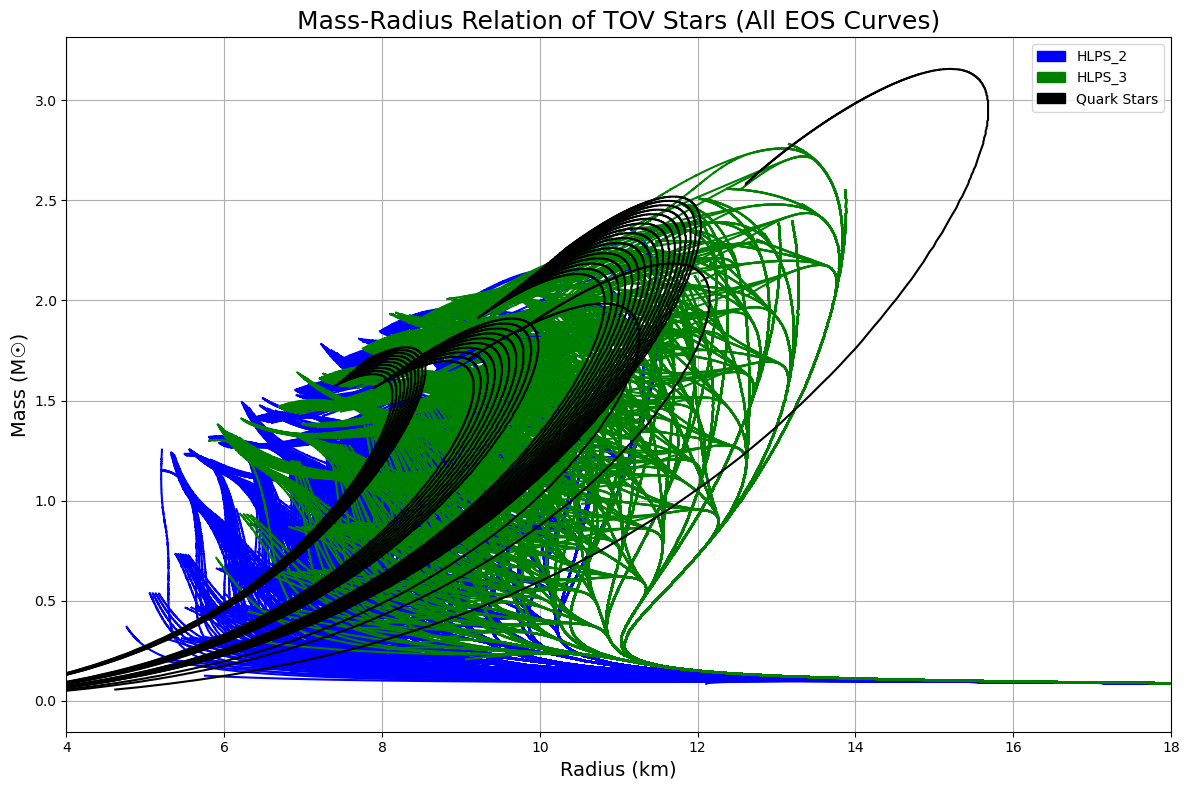

In [17]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import fnmatch
import matplotlib.patches as mpatches
from itertools import product

# --- Configurations ---
gamma_options = [1, 2, 3, 4]
segments = 5
base_folder = "polytropic_stars/polytropic_main"
hlps_variants = ["HLPS_2", "HLPS_3"]

variant_colors = {
    "HLPS_2": "blue",
    "HLPS_3": "green",
    "Quark": "black"
}

def get_gamma1_from_filename(filename):
    index = int(filename.split("_")[1])
    all_gamma_paths = list(product(gamma_options, repeat=segments))
    return all_gamma_paths[index - 1][0]

plt.figure(figsize=(12, 8))

# Plot all HLPS EOS curves
for variant in hlps_variants:
    folder = os.path.join(base_folder, f"TOV_results_1_2_3_4_{variant}")
    if not os.path.exists(folder):
        continue
    for filepath in sorted(glob.glob(os.path.join(folder, "*TOV.csv"))):
        data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
        if data.ndim != 2 or data.shape[1] < 2:
            continue
        M_vals, R_vals = data[:, 0], data[:, 1]
        plt.plot(R_vals, M_vals, color=variant_colors[variant], alpha=1)

# Plot first 10 and last 10 Quark EOS curves per folder
quark_folders = ['Quark Stars/TOV_results_Quark_Stars_part1', 'Quark Stars/TOV_results_Quark_Stars_part2']
for folder in quark_folders:
    if not os.path.exists(folder):
        continue
    files = sorted([f for f in os.listdir(folder) if fnmatch.fnmatch(f, '*.csv')])
    # Select first 10 and last 10 files (without duplicates if less than 20)
    selected_files = files[:10] + files[-10:] if len(files) > 20 else files
    for file in selected_files:
        filepath = os.path.join(folder, file)
        data = np.genfromtxt(filepath, delimiter=',', skip_header=1)
        if data.ndim != 2 or data.shape[1] < 2:
            continue
        M_vals, R_vals = data[:, 0], data[:, 1]
        plt.plot(R_vals, M_vals, color=variant_colors["Quark"], alpha=1)

# Final formatting
plt.xlabel("Radius (km)", fontsize=14)
plt.ylabel("Mass (M☉)", fontsize=14)
plt.title("Mass-Radius Relation of TOV Stars (All EOS Curves)", fontsize=18)
plt.grid(True)

plt.xlim(4, 18)
# Legend handles
patch_hlps2 = mpatches.Patch(color=variant_colors["HLPS_2"], label="HLPS_2")
patch_hlps3 = mpatches.Patch(color=variant_colors["HLPS_3"], label="HLPS_3")
patch_quark = mpatches.Patch(color=variant_colors["Quark"], label="Quark Stars")
plt.legend(handles=[patch_hlps2, patch_hlps3, patch_quark])
plt.tight_layout()
plt.show()
